In [1]:
import numpy as np
import pandas as pd
#Obtener el dataframe
FileCSV="D:/Python/3. Nivel III/4/datos/bank-full.csv"
df_bank=pd.read_csv(FileCSV,sep=";")
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Identificar la distribución de la variable objetivo**

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
clases = (pd.value_counts(df_bank["y"],sort=True))/len(df_bank)*100
clases

no     88.30152
yes    11.69848
Name: y, dtype: float64

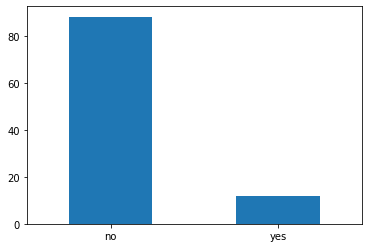

In [12]:
clases.plot(kind="bar",rot=0)
plt.show()

**Codificar las variables categóricas**

In [15]:
from collections import defaultdict
from sklearn import preprocessing

In [16]:
d = defaultdict(preprocessing.LabelEncoder)

In [18]:
tipos = df_bank.columns.to_series().groupby(df_bank.dtypes).groups
tipos

{dtype('int64'): Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 dtype('O'): Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'y'],
       dtype='object')}

In [19]:
list_object = list(tipos[np.dtype("object")])

In [20]:
list_object

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [21]:
fit = df_bank.apply(lambda x: d[x.name].fit_transform(x) if x.name in list_object else x)

In [22]:
df_bank2 = df_bank.apply(lambda x: d[x.name].transform(x) if x.name in list_object else x)

In [23]:
df_bank2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


**Construir los datos de entrenamiento y testeo**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X=df_bank2.iloc[:,0:16].values
y=df_bank2.iloc[:,16].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0,
                                                   stratify=y)

**Balanceo de datos**

In [28]:
from imblearn.combine import SMOTETomek

In [29]:
st = SMOTETomek(ratio=0.7)

In [30]:
X_train_st, y_train_st = st.fit_sample(X_train,y_train)

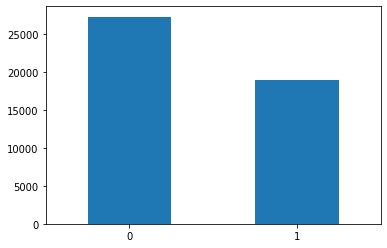

In [31]:
clases2=pd.value_counts(y_train_st,sort=True)
clases2.plot(kind="bar",rot=0)
plt.show()

**Discretización**

**Convertir a DF datos de entrenamiento balanceados**

In [32]:
columnas = list(df_bank2.columns)

In [36]:
predictores = list(columnas[0:16])
target= columnas[16]

In [40]:
data_xs = pd.DataFrame(X_train_st, columns=predictores)
data_y = pd.DataFrame(y_train_st, columns=[target])
data_train = pd.concat([data_xs,data_y], axis=1)

In [41]:
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,34,4,2,2,0,1350,1,0,2,21,8,68,1,-1,0,3,0
1,36,4,2,2,0,1089,1,0,2,30,8,126,1,-1,0,3,0
2,33,1,1,1,0,523,1,0,0,18,8,18,5,360,5,0,0
3,35,7,1,1,0,629,0,1,0,8,5,518,2,-1,0,3,0
4,57,1,1,1,0,25,1,0,0,13,8,378,2,359,1,0,0


In [42]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46188 entries, 0 to 46187
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        46188 non-null  int64
 1   job        46188 non-null  int64
 2   marital    46188 non-null  int64
 3   education  46188 non-null  int64
 4   default    46188 non-null  int64
 5   balance    46188 non-null  int64
 6   housing    46188 non-null  int64
 7   loan       46188 non-null  int64
 8   contact    46188 non-null  int64
 9   day        46188 non-null  int64
 10  month      46188 non-null  int64
 11  duration   46188 non-null  int64
 12  campaign   46188 non-null  int64
 13  pdays      46188 non-null  int64
 14  previous   46188 non-null  int64
 15  poutcome   46188 non-null  int64
 16  y          46188 non-null  int32
dtypes: int32(1), int64(16)
memory usage: 5.8 MB


**Convertir a DF datos de testeo**

In [43]:
data_txs = pd.DataFrame(X_test, columns=predictores)
data_ty = pd.DataFrame(y_test, columns=[target])
data_test = pd.concat([data_txs,data_ty],axis=1)

In [44]:
data_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,41,4,0,2,0,647,1,0,2,16,8,270,1,-1,0,3,0
1,20,0,2,1,0,336,0,1,0,5,6,133,1,-1,0,3,0
2,43,9,2,1,0,33,1,0,2,27,8,93,10,-1,0,3,0
3,45,1,2,1,0,3727,0,0,0,6,10,572,1,-1,0,3,0
4,43,7,1,1,0,0,0,0,2,26,8,483,1,-1,0,3,0


In [45]:
from sklearn.preprocessing import KBinsDiscretizer

In [46]:
estkmeans = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="kmeans")

In [47]:
data_kmeans_train = estkmeans.fit_transform(data_train[["age","balance","day","month","duration"]])
data_kmeans_test = estkmeans.transform(data_test[["age","balance","day","month","duration"]])

In [48]:
data_kmeans_train=pd.DataFrame(data_kmeans_train,
                              columns=["age","balance","day","month","duration"])
data_kmeans_test=pd.DataFrame(data_kmeans_test,
                              columns=["age","balance","day","month","duration"])

In [49]:
data_train[["age"]] = data_kmeans_train[["age"]]
data_train[["balance"]] = data_kmeans_train[["balance"]]
data_train[["day"]] = data_kmeans_train[["day"]]
data_train[["month"]] = data_kmeans_train[["month"]]
data_train[["duration"]] = data_kmeans_train[["duration"]]

In [50]:
data_test[["age"]] = data_kmeans_test[["age"]]
data_test[["balance"]] = data_kmeans_test[["balance"]]
data_test[["day"]] = data_kmeans_test[["day"]]
data_test[["month"]] = data_kmeans_test[["month"]]
data_test[["duration"]] = data_kmeans_test[["duration"]]

In [51]:
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.0,4,2,2,0,0.0,1,0,2,1.0,2.0,0.0,1,-1,0,3,0
1,0.0,4,2,2,0,0.0,1,0,2,2.0,2.0,0.0,1,-1,0,3,0
2,0.0,1,1,1,0,0.0,1,0,0,1.0,2.0,0.0,5,360,5,0,0
3,0.0,7,1,1,0,0.0,0,1,0,0.0,1.0,1.0,2,-1,0,3,0
4,2.0,1,1,1,0,0.0,1,0,0,1.0,2.0,0.0,2,359,1,0,0


In [52]:
data_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.0,4,0,2,0,0.0,1,0,2,1.0,2.0,0.0,1,-1,0,3,0
1,0.0,0,2,1,0,0.0,0,1,0,0.0,1.0,0.0,1,-1,0,3,0
2,1.0,9,2,1,0,0.0,1,0,2,2.0,2.0,0.0,10,-1,0,3,0
3,1.0,1,2,1,0,1.0,0,0,0,0.0,2.0,1.0,1,-1,0,3,0
4,1.0,7,1,1,0,0.0,0,0,2,2.0,2.0,1.0,1,-1,0,3,0


In [ ]:
###############

In [58]:
x_t, y_t = data_train.iloc[:,0:16].values, data_train.iloc[:,16].values
x_p, y_p = data_test.iloc[:,0:16].values, data_test.iloc[:,16].values

**Entrenamiento del modelo**

In [54]:
from sklearn.naive_bayes import GaussianNB

In [56]:
clf = GaussianNB()

In [59]:
clf.fit(x_t,y_t)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
import model_evaluation_utils as meu

In [61]:
y_predict_t = clf.predict(x_t)

In [62]:
label_names=[0,1]

**Performance del modelo para datos de entrenamiento**

In [68]:
clases3=pd.value_counts(y_predict_t,sort=True)
clases3

1    28285
0    17903
dtype: int64

In [63]:
meu.display_model_performance_metrics(true_labels=y_t,
                                     predicted_labels=y_predict_t,
                                     classes=label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7313
Precision: 0.7924
Recall: 0.7313
F1 Score: 0.7301

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.92      0.60      0.73     27286
           1       0.61      0.92      0.74     18902

    accuracy                           0.73     46188
   macro avg       0.77      0.76      0.73     46188
weighted avg       0.79      0.73      0.73     46188


Prediction Confusion Matrix:
------------------------------
       0      1
0  16389  10897
1   1514  17388


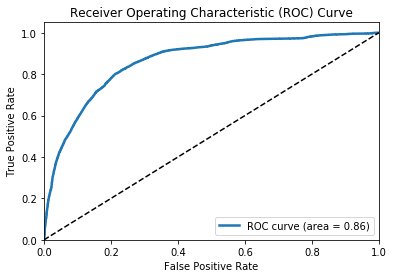

In [64]:
meu.plot_model_roc_curve(clf,x_t,y_t)

**Performance del modelo para datos de testeo**

In [65]:
y_predict_p = clf.predict(x_p)

In [69]:
clases4=pd.value_counts(y_predict_p,sort=True)
clases4

0    7510
1    6054
dtype: int64

In [66]:
meu.display_model_performance_metrics(true_labels=y_p,
                                     predicted_labels=y_predict_p,
                                     classes=label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.6199
Precision: 0.8666
Recall: 0.6199
F1 Score: 0.6875

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.95      0.60      0.74     11977
           1       0.21      0.78      0.33      1587

    accuracy                           0.62     13564
   macro avg       0.58      0.69      0.53     13564
weighted avg       0.87      0.62      0.69     13564


Prediction Confusion Matrix:
------------------------------
      0     1
0  7166  4811
1   344  1243


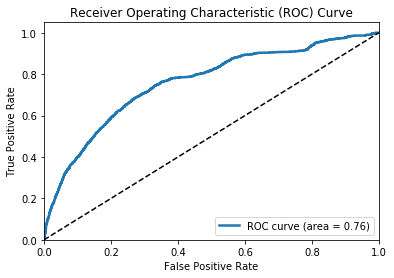

In [67]:
meu.plot_model_roc_curve(clf,x_p,y_p)